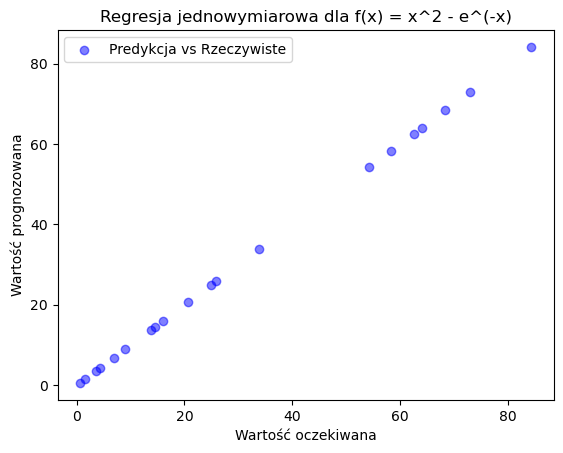

Finalny błąd (MSE): 0.00706


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Zadanie 1: Regresja jednowymiarowa dla f(x) = x^2 - e^(-x)
# Generowanie danych
X = np.linspace(1, 10, 100).reshape(-1, 1)
y = X**2 - np.exp(-X)

# Normalizacja danych
X_mean, X_std = X.mean(), X.std()
X = (X - X_mean) / X_std

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiowanie modelu
model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),   # Większa liczba neuronów
    activation='tanh',                   # Funkcja aktywacji tanh
    solver='adam',                       # Optymalizator Adam
    alpha=0.0001,                        # Mniejszy współczynnik regularizacji
    max_iter=10000,                      # Zwiększenie liczby iteracji
    random_state=42
)

# Trening modelu
model.fit(X_train, y_train.ravel())

# Predykcja
y_pred = model.predict(X_test)

# Wykres wyników
plt.scatter(y_test, y_pred, label='Predykcja vs Rzeczywiste', color='blue', alpha=0.5)
plt.xlabel('Wartość oczekiwana')
plt.ylabel('Wartość prognozowana')
plt.title('Regresja jednowymiarowa dla f(x) = x^2 - e^(-x)')
plt.legend()
plt.show()

# Sprawdzenie błędu
final_loss = mean_squared_error(y_test, y_pred)
print(f'Finalny błąd (MSE): {final_loss:.5f}')


Finalny błąd (MSE) dla wyników sportowych drużyn: 1.28461


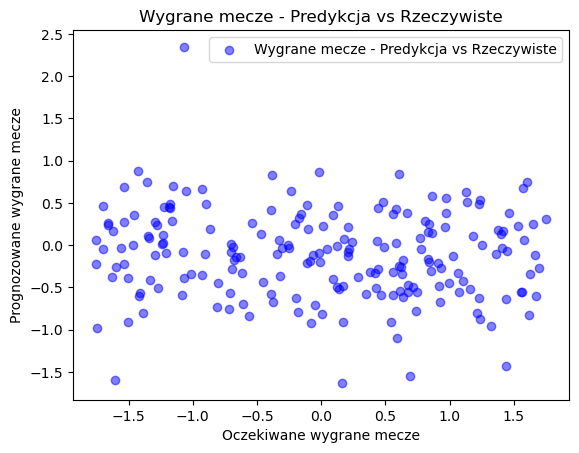

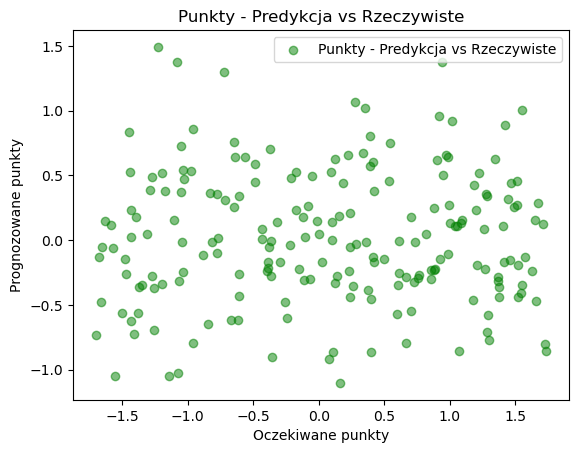

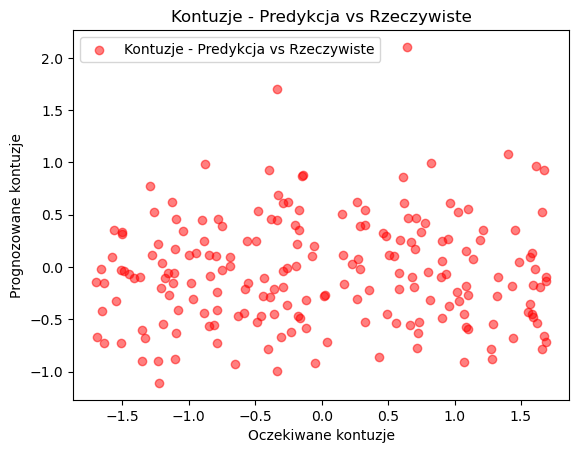

In [2]:
# Zadanie 2: Prognozowanie wyników sportowych drużyn
# Generacja danych
X = np.random.rand(1000, 4) * [10, 10, 15, 5]  # liczba treningów, liczba godzin snu, doświadczenie, strategia
y = np.random.rand(1000, 3) * [30, 100, 10]  # wygrane mecze, punkty, kontuzje

# Normalizacja danych
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std
y_mean, y_std = y.mean(axis=0), y.std(axis=0)
y = (y - y_mean) / y_std

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiowanie modelu
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', alpha=0.01, max_iter=5000, random_state=42)

# Trening modelu
model.fit(X_train, y_train)

# Sprawdzenie błędu
y_pred = model.predict(X_test)
final_loss = mean_squared_error(y_test, y_pred)
print(f'Finalny błąd (MSE) dla wyników sportowych drużyn: {final_loss:.5f}')

# Wyświetlenie wykresów dla wygranych meczów, punktów i kontuzji
plt.scatter(y_test[:, 0], y_pred[:, 0], label='Wygrane mecze - Predykcja vs Rzeczywiste', color='blue', alpha=0.5)
plt.xlabel('Oczekiwane wygrane mecze')
plt.ylabel('Prognozowane wygrane mecze')
plt.title('Wygrane mecze - Predykcja vs Rzeczywiste')
plt.legend()
plt.show()

plt.scatter(y_test[:, 1], y_pred[:, 1], label='Punkty - Predykcja vs Rzeczywiste', color='green', alpha=0.5)
plt.xlabel('Oczekiwane punkty')
plt.ylabel('Prognozowane punkty')
plt.title('Punkty - Predykcja vs Rzeczywiste')
plt.legend()
plt.show()

plt.scatter(y_test[:, 2], y_pred[:, 2], label='Kontuzje - Predykcja vs Rzeczywiste', color='red', alpha=0.5)
plt.xlabel('Oczekiwane kontuzje')
plt.ylabel('Prognozowane kontuzje')
plt.title('Kontuzje - Predykcja vs Rzeczywiste')
plt.legend()
plt.show()